In [1]:
import pandas as pd 
import numpy as np
from FileOpener.CSVReader.CSVReader import CSVReader as csv
from FileOpener.backtester import FinancialBacktest, PfAnalysis, Plot

In [5]:
from pandas.tseries.offsets import MonthEnd 
from dateutil.relativedelta import relativedelta

## 배당성향 

### Shift 함수는 안씀

#### 배당락은 통상 당해 12월 말 결정

#### 배당락 후 3개월 이내

#### 3월 말 이후 리밸런싱

In [3]:
directory = 'CSVFile/FinancialData/Korea'
KSE_div_per = csv.financial_reader('DIV_PER_KSE.csv', directory)

## 3월 말부터 리밸런싱 한다고 반영하였음

In [8]:
KSE_div_per.index = KSE_div_per.index + MonthEnd(3)

In [11]:
KSE_div_per.head()

,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000090,A000100,...,A298050,A298690,A300720,A306200,A900030,A900050,A900140,A950010,A950070,A950100
Code,,,,,,,,,,,,,,,,,,,,,
2001-03-31,NaN,33.10,NaN,NaN,50.99,-9.72,25.18,NaN,NaN,12.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-03-31,NaN,32.30,7.75,NaN,-127.42,17.70,61.84,NaN,NaN,15.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,NaN,32.17,17.73,NaN,29.46,22.75,12.58,NaN,NaN,14.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-31,NaN,47.00,46.54,NaN,277.62,38.71,24.06,NaN,NaN,13.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-31,NaN,37.62,20.03,NaN,NaN,36.71,18.95,NaN,NaN,14.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
KSE_div_per_100 = KSE_div_per > 100 
KSE_div_per_0 = KSE_div_per < 0
KSE_div_per_0_100 = (KSE_div_per > 0) & (KSE_div_per < 100 )

## 연별 수식 구하기

In [15]:
KSE_div_per_100.sum(axis = 1)

Code
2001-03-31    12
2002-03-31    14
2003-03-31    17
2004-03-31    27
2005-03-31    12
2006-03-31    12
2007-03-31    22
2008-03-31    15
2009-03-31    18
2010-03-31     4
2011-03-31    11
2012-03-31    16
2013-03-31    13
2014-03-31    22
2015-03-31    26
2016-03-31    21
2017-03-31    23
2018-03-31    24
Freq: A-MAR, dtype: int64

In [28]:
KSE_div_per_0.sum(axis = 1)

Code
2001-03-31    22
2002-03-31    25
2003-03-31    17
2004-03-31    20
2005-03-31    14
2006-03-31    21
2007-03-31    23
2008-03-31    22
2009-03-31    54
2010-03-31    30
2011-03-31    20
2012-03-31    42
2013-03-31    52
2014-03-31    53
2015-03-31    51
2016-03-31    44
2017-03-31    25
2018-03-31    43
Freq: A-MAR, dtype: int64

In [51]:
KSE_div_per_0_100.sum(axis = 1)

Code
2001-03-31    398
2002-03-31    396
2003-03-31    442
2004-03-31    452
2005-03-31    485
2006-03-31    497
2007-03-31    505
2008-03-31    520
2009-03-31    442
2010-03-31    503
2011-03-31    534
2012-03-31    480
2013-03-31    455
2014-03-31    430
2015-03-31    441
2016-03-31    452
2017-03-31    492
2018-03-31    487
Freq: A-MAR, dtype: int64

## 가격

In [16]:
prc_dir = 'CSVFile/Price/Korea/Stocks/'
KSE_price = csv.price_reader('KOSPI_FROM_1998_close.csv', prc_dir)

In [17]:
KSE_rt = FinancialBacktest(KSE_price)

In [52]:
KSE_div_per_100_rt = KSE_rt.backtest(KSE_div_per_100,'A-MAR','A-MAR')
KSE_div_per_0_rt = KSE_rt.backtest(KSE_div_per_0,'A-MAR','A-MAR')
KSE_div_per_0_100_rt = KSE_rt.backtest(KSE_div_per_0_100,'A-MAR','A-MAR')

D:\WiseData\FileOpener\backtester.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ret.loc[:'1998-05-23'][ret.loc[:'1998-05-23'] > 1.08] = 1.08
C:\Users\fnguide\Anaconda3\lib\site-packages\pandas\core\frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
D:\WiseData\FileOpener\backtester.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [53]:
pf_KSE_div_per_100_rt = PfAnalysis(KSE_div_per_100_rt)
pf_KSE_div_per_0_rt = PfAnalysis(KSE_div_per_0_rt)
pf_KSE_div_per_0_100_rt = PfAnalysis(KSE_div_per_0_100_rt)

## 배당성향이 100 이상 일 때

In [48]:
pf_KSE_div_per_100_rt.rt_preety_print(freq='A-MAR')

평균수익률    17.03%
기하수익률    13.81%
중간수익률    16.26%
dtype: object

In [47]:
pf_KSE_div_per_100_rt.vol_preety_print()

변동성              22.02%
Upside Dev.      14.33%
Downside Dev.    18.10%
MDD              54.07%
dtype: object

Text(0.5,1,'배당 성향이 100 이상인 경우')

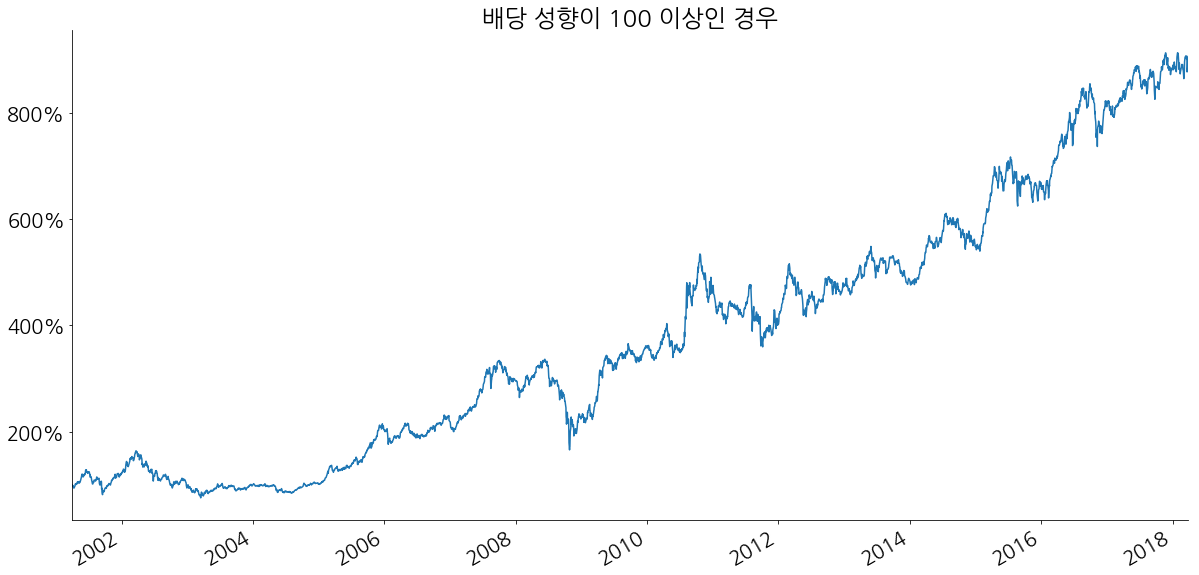

In [40]:
fig, ax = Plot().TimeSeries()
pf_KSE_div_per_100_rt.cumReturn().plot(ax=ax)
ax.set_title('배당 성향이 100 이상인 경우')

## 배당성향이 0 이하 일 때

In [46]:
pf_KSE_div_per_0_rt.rt_preety_print(freq='A-MAR')

평균수익률    17.34%
기하수익률    13.08%
중간수익률    18.94%
dtype: object

In [38]:
pf_KSE_div_per_0_rt.vol_preety_print()

변동성              21.04%
Upside Dev.      12.90%
Downside Dev.    17.87%
MDD              55.15%
dtype: object

Text(0.5,1,'배당 성향이 0 이하인 경우')

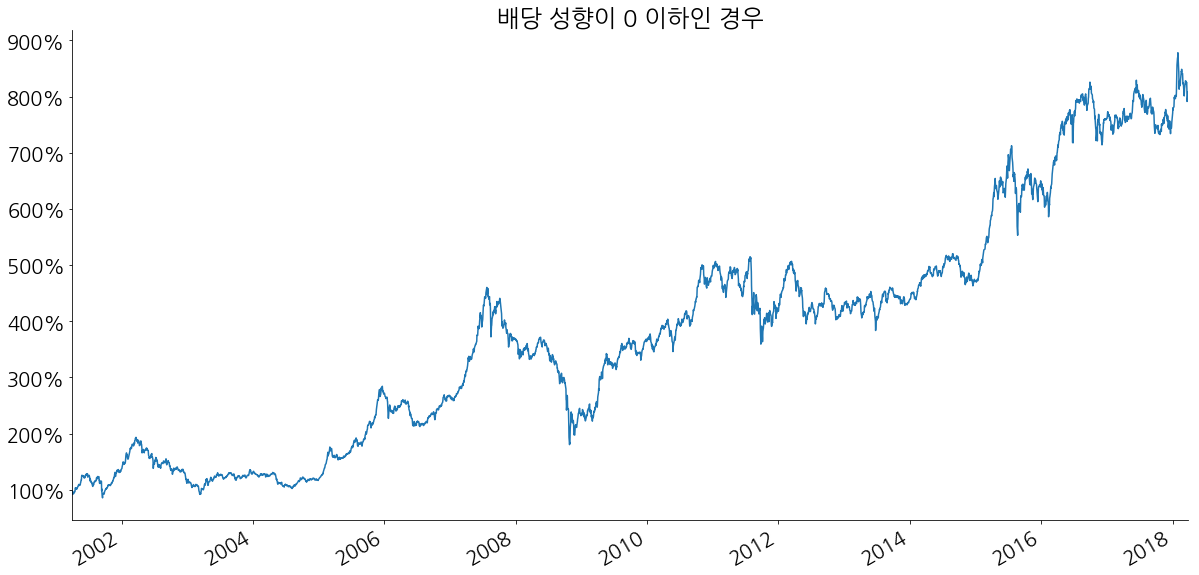

In [41]:
fig, ax = Plot().TimeSeries()
pf_KSE_div_per_0_rt.cumReturn().plot(ax=ax)
ax.set_title('배당 성향이 0 이하인 경우')

## 배당성향이 0 ~ 100 일 때

In [54]:
pf_KSE_div_per_0_100_rt.rt_preety_print(freq='A-MAR')

평균수익률    18.91%
기하수익률    15.76%
중간수익률    18.85%
dtype: object

In [55]:
pf_KSE_div_per_0_100_rt.vol_preety_print()

변동성              18.71%
Upside Dev.      11.41%
Downside Dev.    17.19%
MDD              56.98%
dtype: object

Text(0.5,1,'배당 성향이 0 이상 100 이하인 경우')

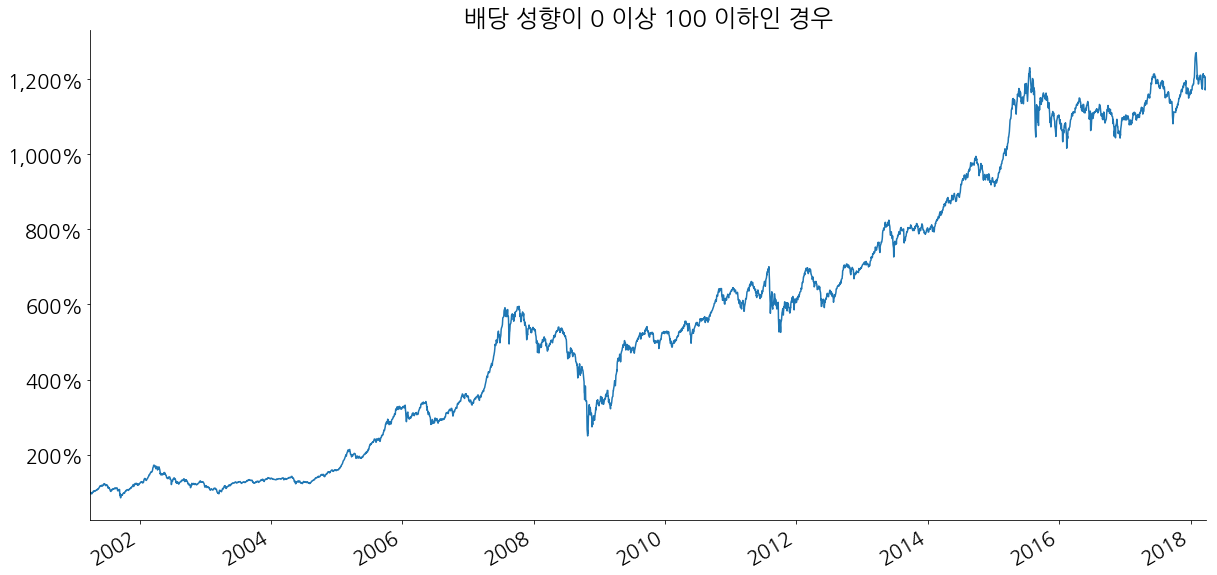

In [56]:
fig, ax = Plot().TimeSeries()
pf_KSE_div_per_0_100_rt.cumReturn().plot(ax=ax)
ax.set_title('배당 성향이 0 이상 100 이하인 경우')